# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

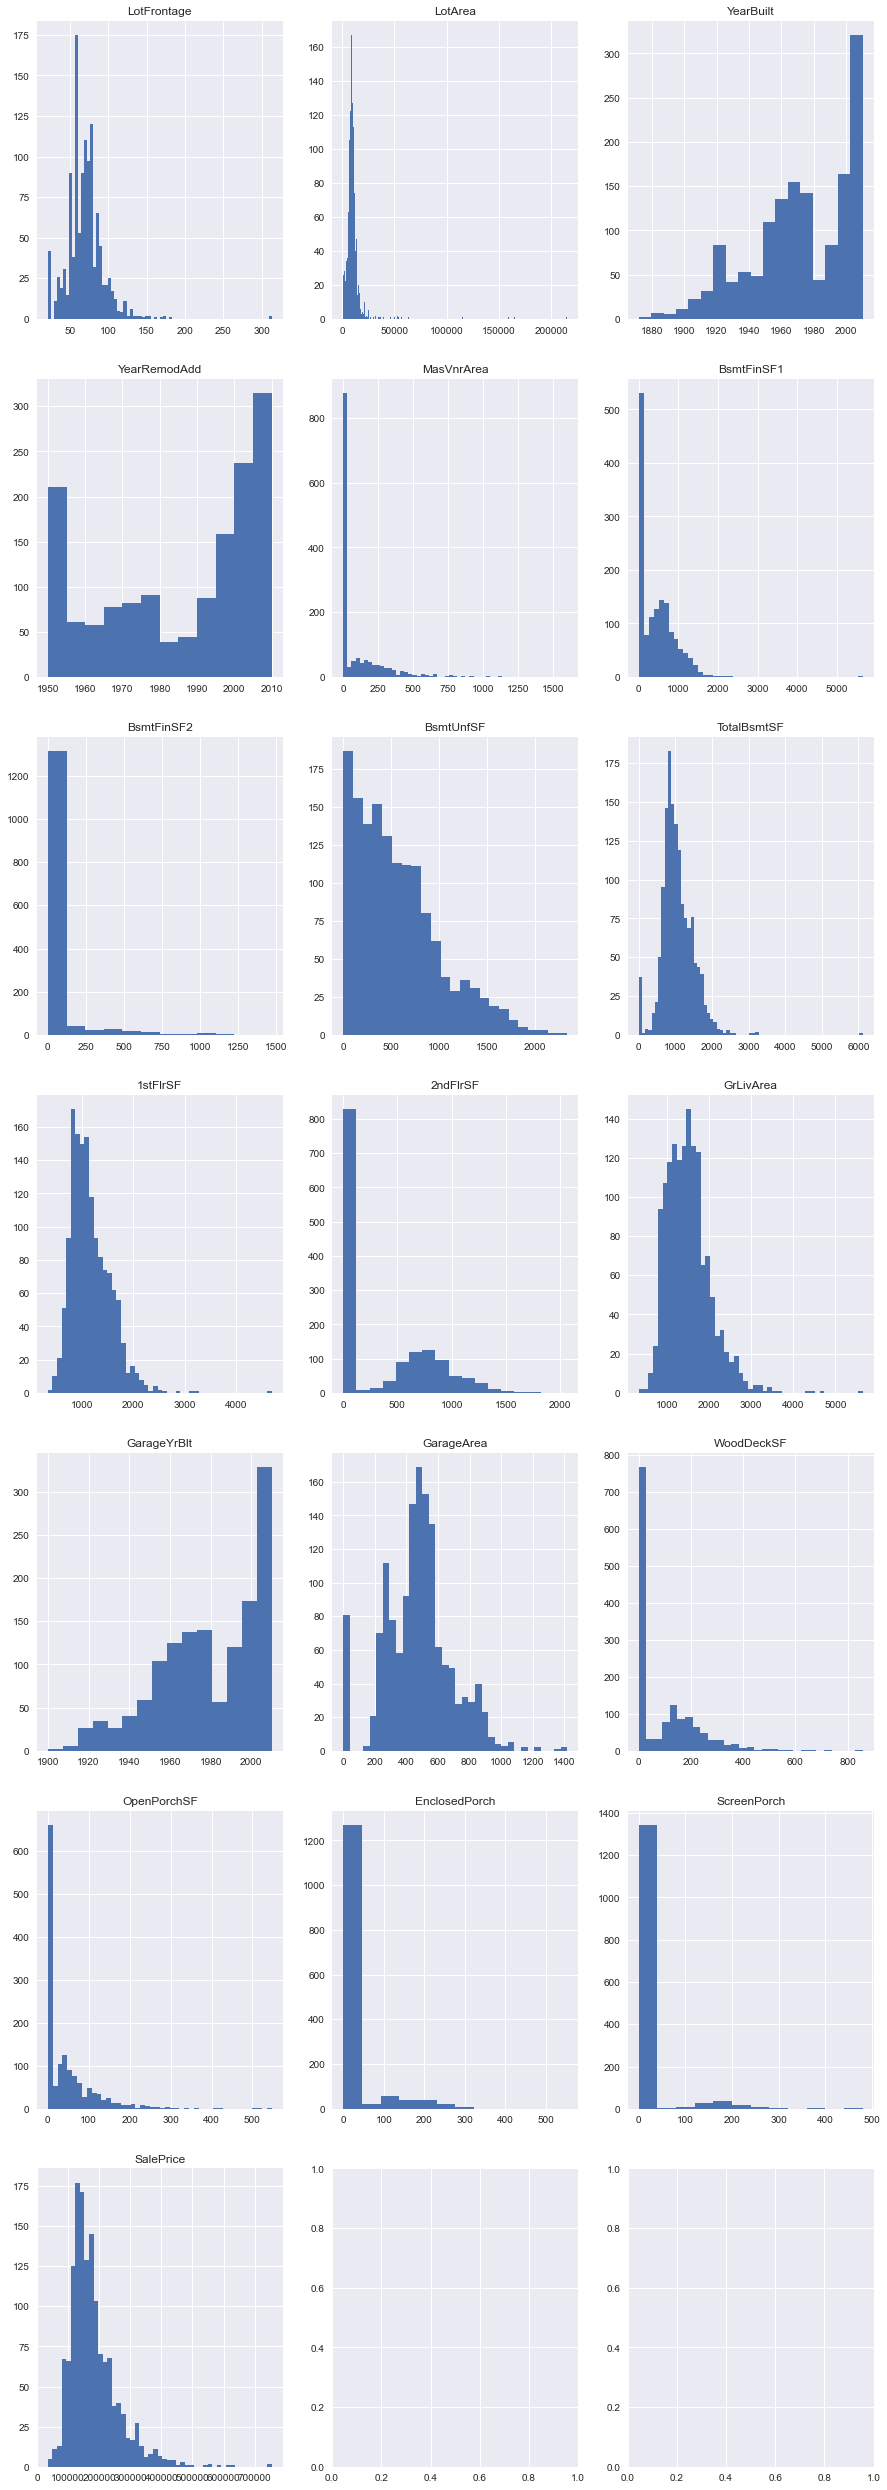

In [2]:
# Your code here
nuniques = ames.nunique()
continuous = [index for index in nuniques.index
              if (nuniques[index] >= 25)
              and (ames[index].dtype != 'object')
              and (index != 'Id')]

ames_cont = ames[continuous]

fig, axes = plt.subplots(figsize = (15,45), ncols = 3, nrows = 7)

for col, ax in zip(continuous, axes.flatten()):
    ax.hist(ames_cont[col], bins = 'auto')
    ax.set_title(col)
    


We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [3]:
# Select non zero-inflated continuous features as ames_cont
# ames_cont = ames_cont.loc[:, ]
import numpy as np
zero_infl = [ames_cont.iloc[:,x].mode()[0] == 0 for x in range(len(ames_cont.columns))]
ames_cont = ames_cont.loc[:,~np.array(zero_infl)]
ames_cont.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,GarageYrBlt,SalePrice
0,65.0,8450,2003,2003,856,1710,2003.0,208500
1,80.0,9600,1976,1976,1262,1262,1976.0,181500
2,68.0,11250,2001,2002,920,1786,2001.0,223500
3,60.0,9550,1915,1970,961,1717,1998.0,140000
4,84.0,14260,2000,2000,1145,2198,2000.0,250000


## Perform log transformations for the variables where it makes sense

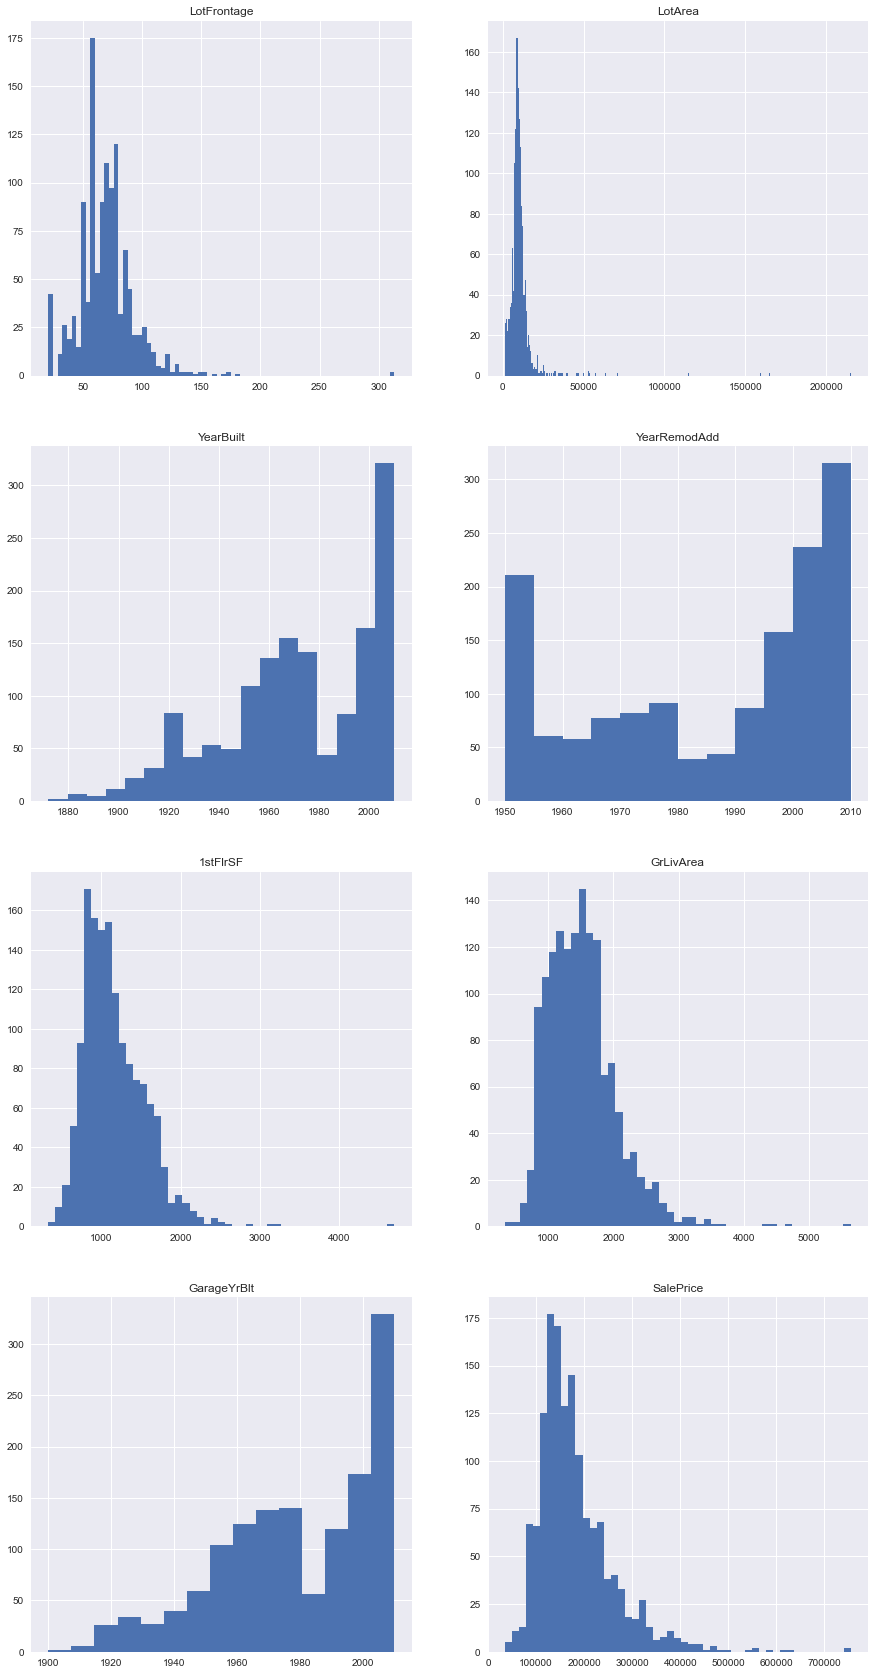

In [4]:
fig, axes = plt.subplots(figsize = (15,30), ncols = 2, nrows = 4)

for col, ax in zip(ames_cont.columns, axes.flatten()):
    ax.hist(ames_cont[col], bins = 'auto')
    ax.set_title(col)

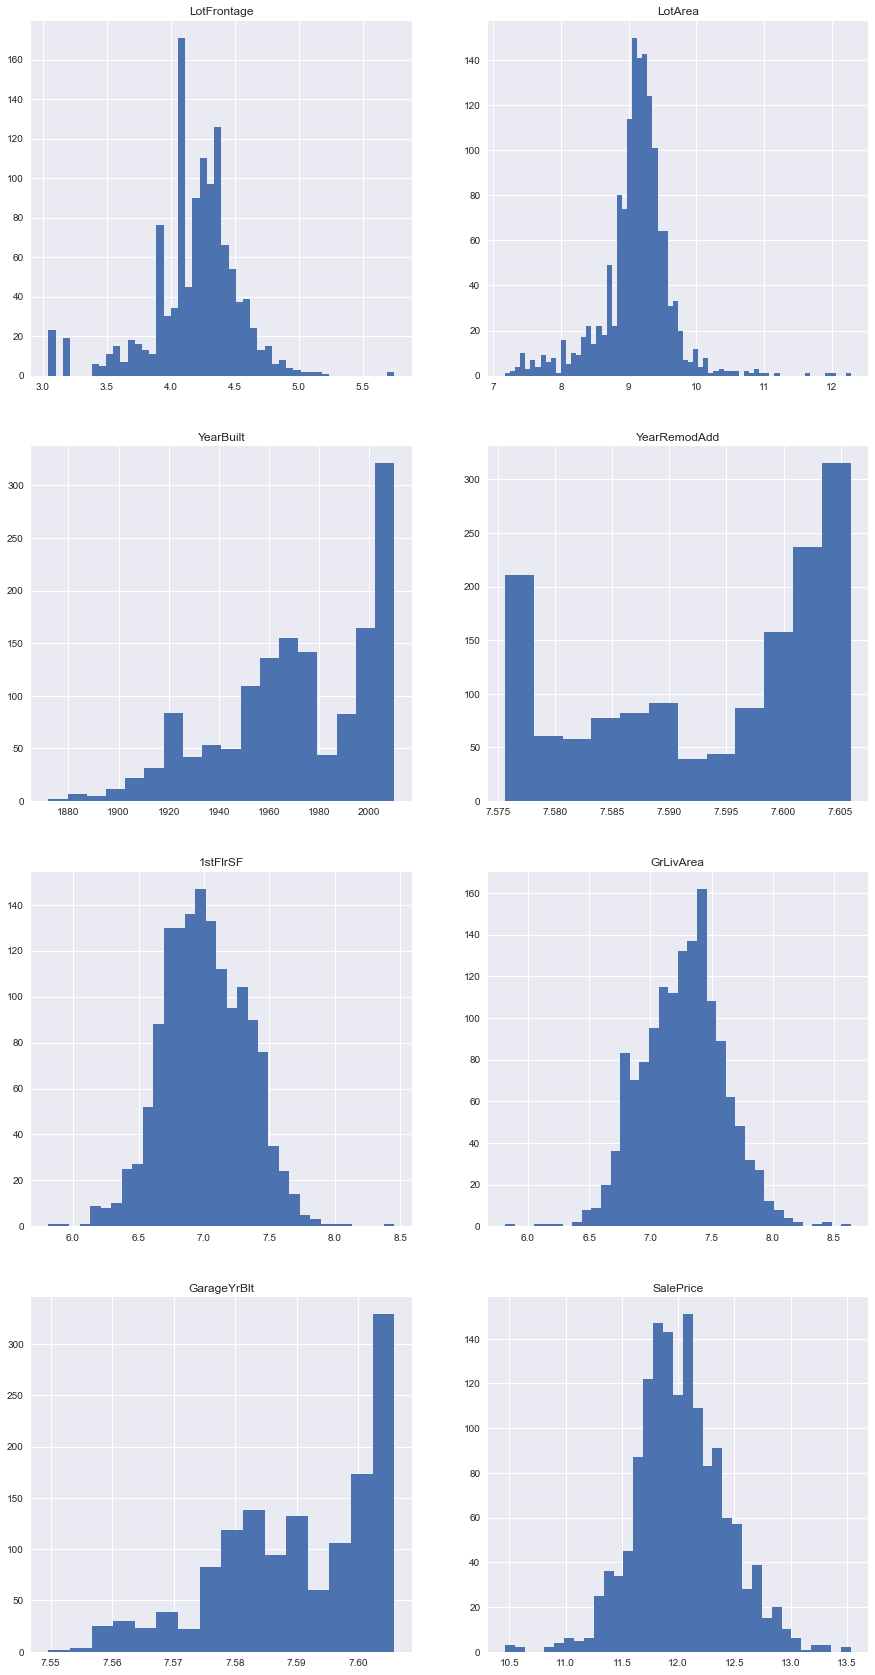

In [5]:
# Your code here
for col in ames_cont.drop('YearBuilt', axis = 1).columns:
    ames_cont[col] = ames_cont[col].map(lambda x: np.log(x))
    
fig, axes = plt.subplots(figsize = (15,30), ncols = 2, nrows = 4)

for col, ax in zip(ames_cont.columns, axes.flatten()):
    ax.hist(ames_cont[col], bins = 'auto')
    ax.set_title(col)

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

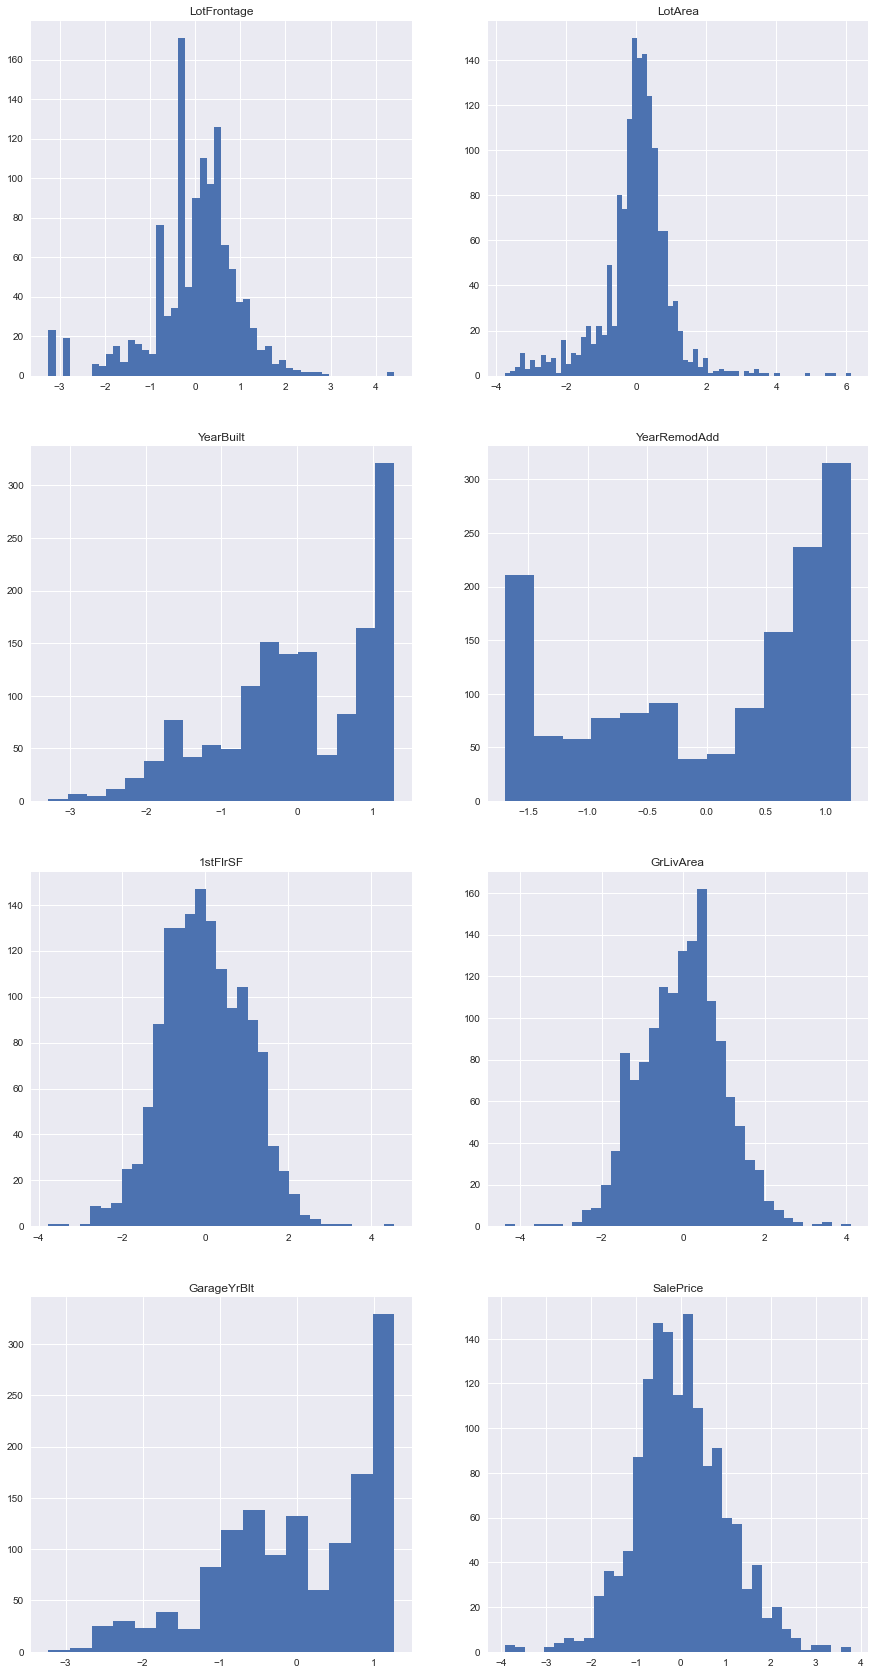

In [6]:
# Your code here
features_final = pd.DataFrame()

for col in ames_cont.columns:
    mean = ames_cont[col].mean()
    std = ames_cont[col].std()
    features_final[col] = ames_cont[col].map(lambda x: (x-mean)/std)
    
fig, axes = plt.subplots(figsize = (15,30), ncols = 2, nrows = 4)

for col, ax in zip(features_final.columns, axes.flatten()):
    ax.hist(features_final[col], bins = 'auto')
    ax.set_title(col)

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!